In [1]:
import numpy as np           # 데이터를 ndarray 및 행렬 자료구조로 다룰 수 있게 해줌
import pandas as pd          # 데이터를 table 자료구조(dataframe)로 다룰 수 있게 해줌
import matplotlib.pyplot as plt   # 2차원 그래프를 나타내는데 용이함
import seaborn as sns             # 수준높은 시각화를 가능하게 함

In [12]:
df = pd.read_csv("C:/Users/Parkjunhan\Desktop/ML_DATA/iris.data.txt", header=None) #index_col = 0을 붙이고 없애는게 앞에 뭐가 붙고안붙고 차이
                                                                                   # header=None 매개변수는 컬럼명있으면 필요없음

df.columns = ['sepal length','sepal width','petal length','petal width','class'] # 컬럼명 추가하는 함수
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
# 컬렴명 확인
df.columns

Index(['sepal length', 'sepal width', 'petal length ', 'petal width', 'class'], dtype='object')

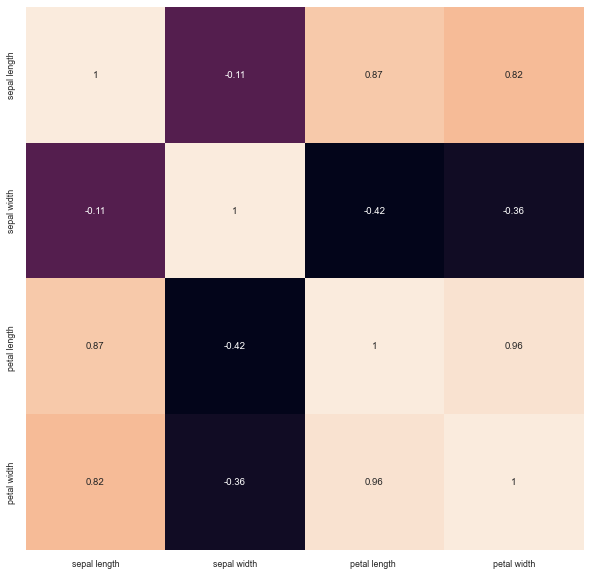

In [4]:
#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df.corr()  # pandas라이브러리에 속한 corr()함수를 통해 상관관계 행렬을 생성한 다음, df_corr객체에 저장

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)         # annot=True를 통해 숫자를 화면에 표시해줌
plt.show()

#Petal length랑 Petal Width가 상관관계 높음

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
X = df.drop(['sepal length', 'sepal width','class'], axis=1) #새로운 데이터프레임 저장
X.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [15]:
Y = df['sepal length'] #pandas의 DataFrame에서 열을 선택하는 문법
Y.head()

0    5.1
1    4.9
2    4.7
3    4.6
4    5.0
Name: sepal length, dtype: float64

In [20]:
# 훈련용 x,y 값을 나누는 코드
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=12)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(120, 2) (120,)
(30, 2) (30,)


In [23]:
# LinearRegression으로 모델학습
from sklearn.linear_model import LinearRegression

model = LinearRegression()            #선형회귀모델 객체생성
model.fit(X_train, Y_train)           # fit함수로 학습
ly_preds = model.predict(X_test)      # 테스트를 위한 입력값에 대한 예측값을 ly_preds 객체에 저장

# 정확도 확인(mse)
from sklearn.metrics import mean_squared_error
print('평균제곱근오차', mean_squared_error(ly_preds, Y_test)) 

평균제곱근오차 0.14370967095212422


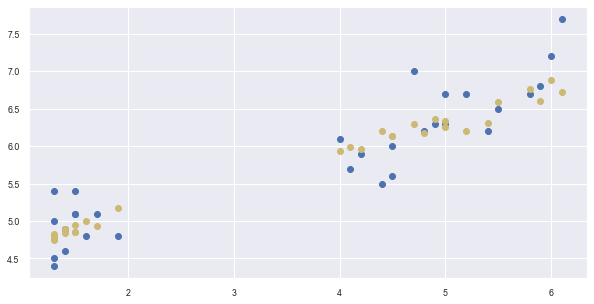

In [27]:
# 예측값과 실제 값 차이를 산점도로 표시, 노란색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], Y_test, label='Y_test')
plt.scatter(X_test['petal length'], ly_preds, c='y', label='ly_preds')
#plt.plot(X_train, lr.predict(X_train), color='blue')
plt.show()     

In [28]:
# DecisionTreeRegression으로 모델학습 
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor()
model.fit(X_train, Y_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

dy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(dy_preds, Y_test))

평균제곱근오차 0.18108673469387762


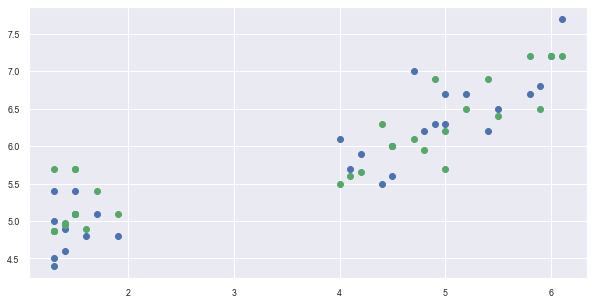

In [29]:
# 예측값과 실제 값 차이를 산점도로 표시, 초록색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], Y_test, label='Y_test')
plt.scatter(X_test['petal length'], dy_preds, c='g', label='dy_preds')
plt.show()  

In [30]:
# RandomForestRegression으로 모델학습 
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)

from sklearn.metrics import mean_squared_error

ry_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(ry_preds, Y_test))

평균제곱근오차 0.15643318477245113


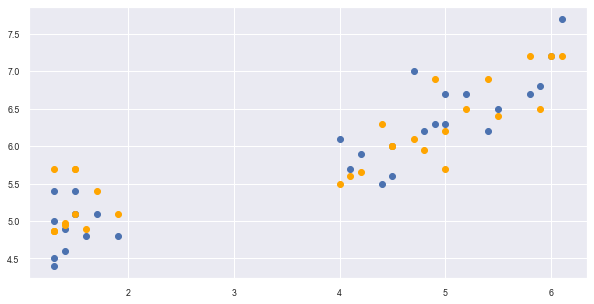

In [33]:
# 예측값과 실제 값 차이를 산점도로 표시, 주황색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], Y_test, label='Y_test')
plt.scatter(X_test['petal length'], dy_preds, c='orange', label='ry_preds')
plt.show()  

In [34]:
# SVR 모델으로 모델학습 
from sklearn.svm import SVR

model = SVR(kernel='linear')
model.fit(X_train, Y_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

sy_preds = model.predict(X_test)
print('평균제곱근오차', mean_squared_error(sy_preds, Y_test))

평균제곱근오차 0.1414381390286616


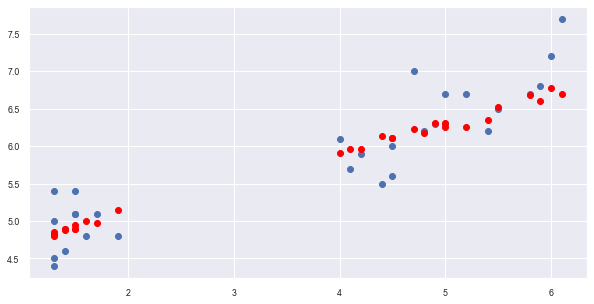

In [35]:
# 예측값과 실제 값 차이를 산점도로 표시, 빨간색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], Y_test, label='Y_test')
plt.scatter(X_test['petal length'], sy_preds, c='red', label='sy_preds')

plt.show()    

In [36]:
# kNN 모델으로 모델학습
from sklearn.neighbors import KNeighborsRegressor

k = 5  # 이웃의 수
knn_regressor = KNeighborsRegressor(n_neighbors=k)
knn_regressor.fit(X_train, Y_train)

# 정확도 확인(mse) 
from sklearn.metrics import mean_squared_error

ky_preds = knn_regressor.predict(X_test)
print('평균제곱근오차', mean_squared_error(ky_preds, Y_test))

평균제곱근오차 0.1411466666666667


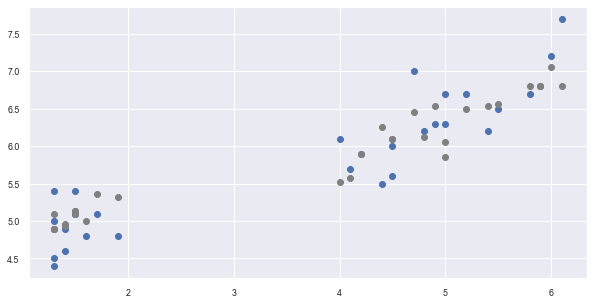

In [38]:
# 예측값과 실제 값 차이를 산점도로 표시, 빨간색 예측

plt.figure(figsize=(10,5))
plt.scatter(X_test['petal length'], Y_test, label='Y_test')
plt.scatter(X_test['petal length'], ky_preds, c='grey', label='ky_preds')

plt.show()    